In [1]:
from importlib.metadata import version
print(version("pm4py"))

2.7.15.2


In [2]:
import sys
import os
import pm4py

# Absolute path to the parent directory that contains `datasets`
parent_dir = os.path.abspath(os.path.dirname(os.getcwd()))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


/home/peng-luh/__github/l3s-offshore-2/.venv/lib/python3.9/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/home/peng-luh/__github/l3s-offshore-2/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1000/1000 [00:00<00:00, 3157.09it/s]


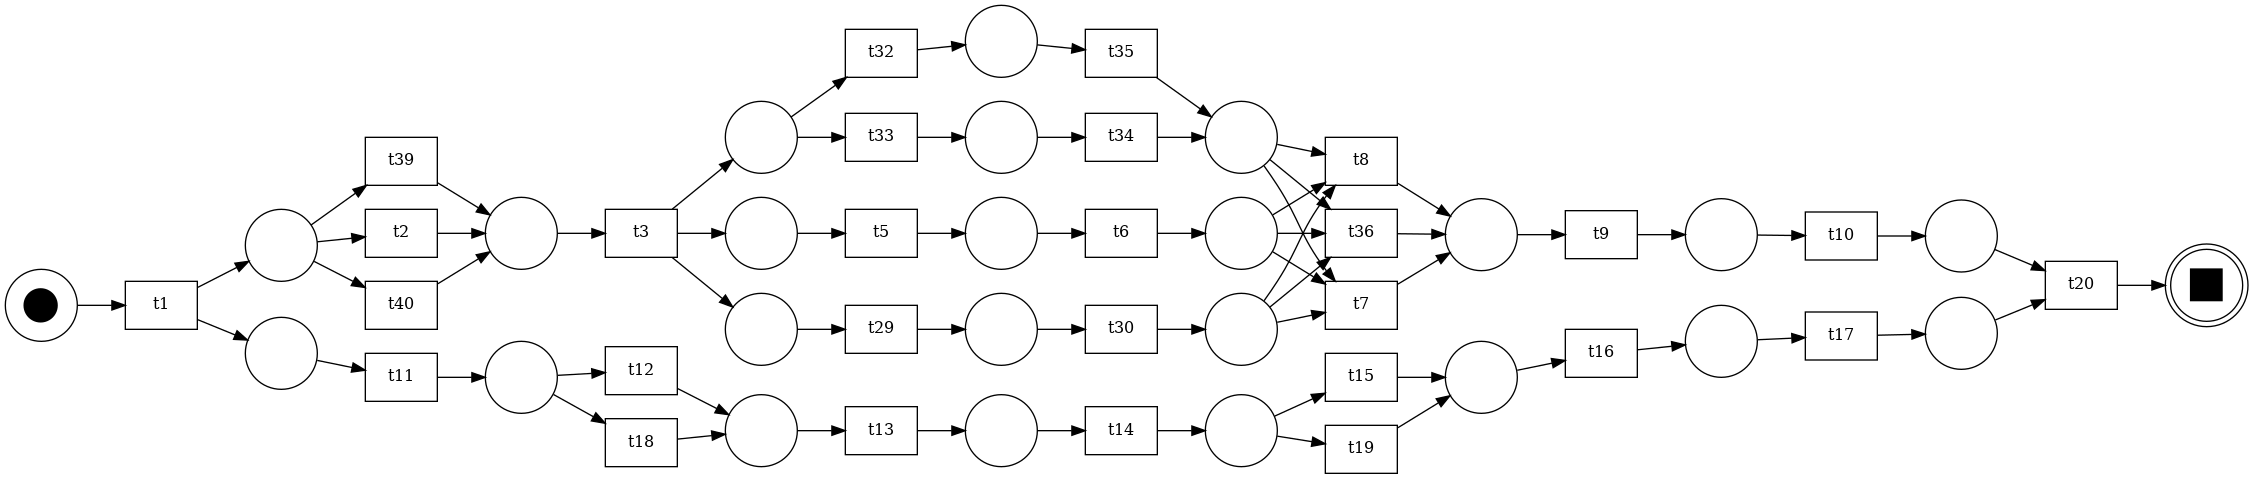

In [3]:
# Import Petri nets model from PNML file
# pn: Petri net
# im: initial marking
# fm: final marking

event_log = pm4py.read_xes('../datasets/Process Discovery Contest 2023_1_all/Base Logs/pdc2023_000000.xes')

pn, im, fm = pm4py.read_pnml('../datasets/Process Discovery Contest 2023_1_all/Models/pdc2023_000000.pnml')
pm4py.view_petri_net(pn, im, fm)

In [4]:
# from pprint import pprint
# results = pm4py.sim.play_out(pn, im, fm)
# pprint(results)

In [5]:
# from l3s_offshore_2.petri_net_sim.gspn import SimpleSimulator

# # 3. Simulate
# sim = SimpleSimulator(pn, im)
# sim.run()
# print("Firing log:", sim.firing_log)
# print("Firing seq:", sim.get_firing_sequence())

In [6]:
from l3s_offshore_2.petri_net_sim.simplepn import SimplePN

simple_pn = SimplePN.convert_to_simple_pn(pn)

print(type(simple_pn))

<class 'l3s_offshore_2.petri_net_sim.simplepn.SimplePN'>


In [7]:
t_12 = simple_pn.get_transition_by_label(t_label='t12')
t_12.in_arcs

{n11->(n35, 't12')}

In [8]:
t_18 = simple_pn.get_transition_by_label(t_label='t18')
t_18.in_arcs

{n11->(n41, 't18')}

In [9]:
print(type(list(im.keys())[0]))

pp = list(im.items())

for p in pp:
    print(type(p[0]))
    print(type(p[1]))

# p = simple_pn.get_place_by_name('n1')

# p.name == pp.name

<class 'pm4py.objects.petri_net.obj.PetriNet.Place'>
<class 'pm4py.objects.petri_net.obj.PetriNet.Place'>
<class 'int'>


In [10]:
t = simple_pn.transitions.pop()
print(type(t.name))
print(t.priority)

print(t)

<class 'str'>
None
(n36, 't13')


In [11]:
from l3s_offshore_2.petri_net_sim.simplepn import SimpleSimulator

sim = SimpleSimulator(net=simple_pn, initial_marking=im)

In [12]:
sim.run()

(n26, 't1')
[0] Fired t1; tokens={'n3': 0, 'n12': 0, 'n11': 0, 'n1': 0, 'n9': 0, 'n16': 0, 'n20': 0, 'n13': 0, 'n24': 0, 'n17': 0, 'n4': 0, 'n8': 0, 'n7': 0, 'n15': 0, 'n19': 0, 'n2': 1, 'n18': 0, 'n22': 0, 'n14': 0, 'n5': 0, 'n6': 0, 'n21': 0, 'n23': 0, 'n10': 1, 'n25': 0}
Enabled Transitions: [(n52, 't39'), (n34, 't11'), (n53, 't40'), (n27, 't2')]
(n27, 't2')
[0] Fired t2; tokens={'n3': 1, 'n12': 0, 'n11': 0, 'n1': 0, 'n9': 0, 'n16': 0, 'n20': 0, 'n13': 0, 'n24': 0, 'n17': 0, 'n4': 0, 'n8': 0, 'n7': 0, 'n15': 0, 'n19': 0, 'n2': 0, 'n18': 0, 'n22': 0, 'n14': 0, 'n5': 0, 'n6': 0, 'n21': 0, 'n23': 0, 'n10': 1, 'n25': 0}
Enabled Transitions: [(n44, 't3'), (n34, 't11')]
(n44, 't3')
[0] Fired t3; tokens={'n3': 0, 'n12': 0, 'n11': 0, 'n1': 0, 'n9': 0, 'n16': 0, 'n20': 1, 'n13': 0, 'n24': 0, 'n17': 0, 'n4': 1, 'n8': 0, 'n7': 0, 'n15': 0, 'n19': 1, 'n2': 0, 'n18': 0, 'n22': 0, 'n14': 0, 'n5': 0, 'n6': 0, 'n21': 0, 'n23': 0, 'n10': 1, 'n25': 0}
Enabled Transitions: [(n47, 't32'), (n45, 't29'),

In [13]:
sim.get_firing_sequence()

OrderedDict([('t1', 0),
             ('t2', 0),
             ('t3', 0),
             ('t29', 0),
             ('t5', 0),
             ('t11', 0),
             ('t30', 0),
             ('t18', 0),
             ('t33', 0),
             ('t34', 0),
             ('t6', 0),
             ('t8', 0),
             ('t9', 0),
             ('t10', 0)])

In [14]:
sim.current_marking

{'n3': 0,
 'n12': 1,
 'n11': 0,
 'n1': 0,
 'n9': 1,
 'n16': 0,
 'n20': 0,
 'n13': 0,
 'n24': 0,
 'n17': 0,
 'n4': 0,
 'n8': 0,
 'n7': 0,
 'n15': 0,
 'n19': 0,
 'n2': 0,
 'n18': 0,
 'n22': 0,
 'n14': 0,
 'n5': 0,
 'n6': 0,
 'n21': 0,
 'n23': 0,
 'n10': 0,
 'n25': 0}

In [15]:
print(sim.current_marking['n17'])

0


In [16]:
sim.get_enabled_transitions()

[]

In [17]:
t = simple_pn.get_transition_by_name(t_name="(n50, 't35')")

print(type(t))

<class 'NoneType'>


In [18]:
simple_pn.arcs

{(n26, 't1')->n10,
 (n26, 't1')->n2,
 (n27, 't2')->n3,
 (n28, 't5')->n5,
 (n29, 't6')->n6,
 (n30, 't7')->n7,
 (n31, 't8')->n7,
 (n32, 't9')->n8,
 (n33, 't10')->n9,
 (n34, 't11')->n11,
 (n35, 't12')->n12,
 (n36, 't13')->n13,
 (n37, 't14')->n14,
 (n38, 't15')->n15,
 (n39, 't16')->n16,
 (n40, 't17')->n17,
 (n41, 't18')->n12,
 (n42, 't19')->n15,
 (n43, 't20')->n18,
 (n44, 't3')->n19,
 (n44, 't3')->n20,
 (n44, 't3')->n4,
 (n45, 't29')->n21,
 (n46, 't30')->n22,
 (n47, 't32')->n25,
 (n48, 't33')->n24,
 (n49, 't34')->n23,
 (n50, 't35')->n23,
 (n51, 't36')->n7,
 (n52, 't39')->n3,
 (n53, 't40')->n3,
 n1->(n26, 't1'),
 n10->(n34, 't11'),
 n11->(n35, 't12'),
 n11->(n41, 't18'),
 n12->(n36, 't13'),
 n13->(n37, 't14'),
 n14->(n38, 't15'),
 n14->(n42, 't19'),
 n15->(n39, 't16'),
 n16->(n40, 't17'),
 n17->(n43, 't20'),
 n19->(n47, 't32'),
 n19->(n48, 't33'),
 n2->(n27, 't2'),
 n2->(n52, 't39'),
 n2->(n53, 't40'),
 n20->(n45, 't29'),
 n21->(n46, 't30'),
 n22->(n30, 't7'),
 n22->(n31, 't8'),
 n22->(n51,

In [19]:
results = pm4py.sim.play_out(pn, im)

pprint(results)

Exception: Unsupported model for playout